# 第 17 章 使用API

## 使用Web API(Application Programming Interface)

In [ ]:
#Web API是网站的一部分，用于与使用具体URL请求特定信息的程序交互。这种请求称为API调用 。
#请求的数据将以易于处理的格式（如JSON或CSV）返回。
#依赖于外部数据源的大多数应用程序依赖于API调用，如集成社交媒体网站的应用程序。

### Git和GitHub

In [ ]:
#使用GitHub的API来请求有关该网站中Python项目的信息，再使用Plotly生成交互式可视化图表，呈现这些项目的受欢迎程度。

#GitHub的名字源自Git，后者是一个分布式版本控制系统，帮助人们管理为项目所做的工作，避免个人所做的修改影响其他人所做的修改
#在项目中实现新功能时，Git跟踪你对每个文件所做的修改。确定代码可行后，你提交所做的修改，而Git将记录项目最新的状态。
#如果犯了错，想撤销所做的修改，可以轻松地返回到以前的任何可行状态
#GitHub上的项目都存储在仓库中，后者包含与项目相关联的一切：代码、项目参与者的信息、问题或bug报告，等等。

#GitHub用户可以给喜欢的项目加星（star）以表示支持，还可以跟踪自己可能想使用的项目。
#在本章中，编写一个程序，自动下载GitHub上星级最高的Python项目的信息，并对这些信息进行可视化。

### 使用API调用请求数据

In [ ]:
https://api.github.com/search/repositories?q=language:python&sort=stars
#这个调用返回GitHub当前托管了多少个Python项目，以及有关最受欢迎的Python仓库的信息
#开头的https://api.github.com/ 将请求发送到GitHub网站中响应API调用的部分
#接下来的search/repositories 让API搜索GitHub上的所有仓库。
#repositories 后面的问号指出需要传递一个实参,q表示查询
#等号（=）让我们能够开始指定查询。
#language:python 指出只想获取主要语言为Python的仓库的信息
#最后的&sort=stars 指定将项目按星级排序。

In [ ]:
#"incomplete_results" 的值为false，由此知道请求是成功的（并非不完整的）。
#倘若GitHub无法处理该API，此处返回的值将为true 。
#接下来的列表中显示了返回的"items" ，其中包含GitHub上最受欢迎的Python项目的详细信息

### 安装Requests

### 处理API响应

In [2]:
#自动执行API调用并处理结果，以找出GitHub上星级最高的Python项目：
import requests

# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 将API响应赋给一个变量。
response_dict = r.json()

# 处理结果。
print(response_dict.keys())

Status code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


In [ ]:
#状态码为200，由此知道请求成功了。响应字典只包含三个键：'total_count' 、'incomplete_results' 和'items'

#像这样简单的调用应该会返回完整的结果集，因此完全可以忽略与'incomplete_results' 关联的值。
#但在执行更复杂的API调用时，应检查这个值。

### 处理响应字典

In [4]:
import requests
# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 将API响应赋给一个变量。
response_dict = r.json()
print(f"Total repositories: {response_dict['total_count']}")

# 探索有关仓库的信息。
repo_dicts = response_dict['items']
print(f"Repositories returned: {len(repo_dicts)}")

# 研究第一个仓库。
repo_dict = repo_dicts[0]
print(f"\nKeys: {len(repo_dict)}")
for key in sorted(repo_dict.keys()):
    print(key)

Status code: 200
Total repositories: 14422931
Repositories returned: 30

Keys: 80
allow_forking
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_discussions
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
is_template
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
topics
trees_url
updated_at
url
visibility
watchers
watchers_count
web_commit_signoff_re

In [ ]:
#repo_dict 包含73个键。通过仔细查看这些键，可大致知道可提取有关项目的哪些信息。
#（要准确地获悉API将返回哪些信息，要么阅读文档，要么像这里一样使用代码来查看。）

#下面来提取repo_dict 中与一些键相关联的值：

In [7]:
import requests

# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 将API响应赋给一个变量。
response_dict = r.json()
print(f"Total repositories: {response_dict['total_count']}")

# 研究有关仓库的信息。
repo_dicts = response_dict['items']
print(f"Repositories returned: {len(repo_dicts)}")

# 研究第一个仓库。
repo_dict = repo_dicts[0]

print("\nSelected information about first repository:")
print(f"Name: {repo_dict['name']}")
print(f"Owner: {repo_dict['owner']['login']}")
print(f"Stars: {repo_dict['stargazers_count']}")
print(f"Repository: {repo_dict['html_url']}")
print(f"Created: {repo_dict['created_at']}")
print(f"Updated: {repo_dict['updated_at']}")
print(f"Description: {repo_dict['description']}")

Status code: 200
Total repositories: 13993356
Repositories returned: 30

Selected information about first repository:
Name: system-design-primer
Owner: donnemartin
Stars: 259628
Repository: https://github.com/donnemartin/system-design-primer
Created: 2017-02-26T16:15:28Z
Updated: 2024-06-07T03:15:03Z
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.


In [ ]:
#从上述输出可知，在本书编写期间，GitHub上星级最高的Python项目为...，其所有者为用户...，有...多位GitHub用户加星了
#可以看到这个项目仓库的URL，其创建时间为...，且最近更新了。
#最后，描述指出项目...包含一系列深受欢迎的Python资源。

### 概述最受欢迎的仓库

In [9]:
#编写一个循环，打印API调用返回的每个仓库的特定信息，以便能够在可视化中包含所有这些信息：
import requests

# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 将API响应赋给一个变量。
response_dict = r.json()
print(f"Total repositories: {response_dict['total_count']}")

# 研究有关仓库的信息。
repo_dicts = response_dict['items']
print(f"Repositories returned: {len(repo_dicts)}")
print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    print(f"\nName: {repo_dict['name']}")
    print(f"Owner: {repo_dict['owner']['login']}")
    print(f"Stars: {repo_dict['stargazers_count']}")
    print(f"Repository: {repo_dict['html_url']}")
    print(f"Description: {repo_dict['description']}")
     
#遍历repo_dicts 中的所有字典。在这个循环中，打印每个项目的名称、所有者、星级、在GitHub上的URL以及描述：

Status code: 200
Total repositories: 13658442
Repositories returned: 30

Selected information about each repository:

Name: AutoGPT
Owner: Significant-Gravitas
Stars: 162809
Repository: https://github.com/Significant-Gravitas/AutoGPT
Description: AutoGPT is the vision of accessible AI for everyone, to use and to build on. Our mission is to provide the tools, so that you can focus on what matters.

Name: Python-100-Days
Owner: jackfrued
Stars: 151358
Repository: https://github.com/jackfrued/Python-100-Days
Description: Python - 100天从新手到大师

Name: keras
Owner: keras-team
Stars: 61139
Repository: https://github.com/keras-team/keras
Description: Deep Learning for humans

Name: gpt4free
Owner: xtekky
Stars: 58603
Repository: https://github.com/xtekky/gpt4free
Description: The official gpt4free repository | various collection of powerful language models

Name: scikit-learn
Owner: scikit-learn
Stars: 58555
Repository: https://github.com/scikit-learn/scikit-learn
Description: scikit-learn: mach

### 监视API的速率限制

In [ ]:
#大多数API存在速率限制,在特定时间内可执行的请求数存在限制。
#要获悉是否接近了GitHub的限制，请在浏览器中输入
https://api.github.com/rate_limit

#类似于下面的响应：
 {
 "resources": {
     "core": {
         "limit": 60,
         "remaining": 58,
         "reset": 1550385312
 },
❶ "search": {
    ❷ "limit": 10,
    ❸ "remaining": 8,
    ❹ "reset": 1550381772
 },
     
 --snip--
#关心的信息是搜索API的速率限制（见❶）。
#从❷处可知，极限为每分钟10个请求，而在当前分钟内，还可执行8个请求（见❸）
#reset 值指的是配额将重置的Unix时间 或新纪元时间 （1970年1月1日午夜后多少秒）（见❹）。
#用完配额后，你将收到一条简单的响应，由此知道已到达API极限。到达极限后，必须等待配额重置。

#很多API要求注册获得API密钥后才能执行API调用。本书编写期间，GitHub没有这样的要求，但获得API密钥后，配额将高得多

## 使用Plotly可视化仓库

In [11]:
import requests
from plotly.graph_objs import Bar
from plotly import offline

# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 处理结果。
response_dict = r.json()
repo_dicts = response_dict['items']
repo_names, stars = [], []
for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

# 可视化。
data = [{
    'type': 'bar',
    'x': repo_names,
    'y': stars,
}]
my_layout = {
    'title': 'GitHub上最受欢迎的Python项目',
    'xaxis': {'title': 'Repository'},
    'yaxis': {'title': 'Stars'},
}
fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='python_repos.html')


Status code: 200


'python_repos.html'

In [ ]:
#像第15章的绘制直方图项目中定义列表data 那样，这里也使用字典来定义布局，因此不需要导入Layout 类。
#这里也打印API响应的状态，以便知道是否出现了问题。现在早已确定了所需的数据是存在的，因此删除部分处理API响应的代码。
#创建两个空列表，用于存储要在图表中呈现的数据。
#需要每个项目的名称，用于给条形添加标签，还需要知道项目获得了多少个星，用于指定条形的高度。
#在循环中，将每个项目的名称和星级分别附加到这两个列表末尾。
#定义列表data 。它像第16章的列表data一样包含一个字典，指定了图表的类型，以及：x值为项目名称，y值为项目获得了多少个星
#使用字典定义图表的布局。没有创建Layout实例，而是创建了包含布局规范的字典，并指定了图表的名称以及每个坐标轴的标签

### 改进Plotly图表

In [12]:
import requests
from plotly.graph_objs import Bar
from plotly import offline

# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 处理结果。
response_dict = r.json()
repo_dicts = response_dict['items']
repo_names, stars = [], []
for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

#可视化
data = [{
 'type': 'bar',
 'x': repo_names,
 'y': stars,
 'marker': {
 'color': 'rgb(60, 100, 150)',
 'line': {'width': 1.5, 'color': 'rgb(25, 25, 25)'}
 },
 'opacity': 0.6,
}]

my_layout = {
    'title': 'GitHub上最受欢迎的Python项目',
    'xaxis': {'title': 'Repository'},
    'yaxis': {'title': 'Stars'},
}
fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='python_repos.html')


Status code: 200


'python_repos.html'

In [ ]:
#marker 设置影响条形设计。
#给条形指定了一种自定义的蓝色，加上了宽1.5像素的深灰色轮廓，还将条形的不透明度设置为0.6，以免图表过于惹眼

#下面来修改my_layout

In [13]:
import requests
from plotly.graph_objs import Bar
from plotly import offline

# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 处理结果。
response_dict = r.json()
repo_dicts = response_dict['items']
repo_names, stars = [], []
for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

#可视化
data = [{
 'type': 'bar',
 'x': repo_names,
 'y': stars,
 'marker': {
 'color': 'rgb(60, 100, 150)',
 'line': {'width': 1.5, 'color': 'rgb(25, 25, 25)'}
 },
 'opacity': 0.6,
}]

my_layout = {
    'title': 'GitHub上最受欢迎的Python项目',
    'titlefont': {'size': 28},
    'xaxis': {
    'title': 'Repository',
    'titlefont': {'size': 24},
    'tickfont': {'size': 14},
    },
    'yaxis': {
    'title': 'Stars',
    'titlefont': {'size': 24},
    'tickfont': {'size': 14},
    },
}

fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='python_repos.html')


Status code: 200


'python_repos.html'

In [ ]:
#使用键'titlefont' 指定图表名称的字号。
#在字典'xaxis' 中，添加指定x轴标签字号的设置（'titlefont' ）和刻度标签字号的设置（'tickfont'）。
#由于这些设置嵌套在字典中，还可以使用相应的键指定坐标轴标签和刻度标签的颜色和字体。
#给y轴指定类似的设置

### 添加自定义工具提示

In [ ]:
#在Plotly中，将鼠标指向条形将显示其表示的信息。这通常称为工具提示 。
#在本例中，当前显示的是项目获得了多少个星。下面来创建自定义工具提示，以显示项目的描述和所有者。
#为生成这样的工具提示，需要再提取一些信息并修改对象data ：

In [14]:
import requests
from plotly.graph_objs import Bar
from plotly import offline

# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 处理结果。
response_dict = r.json()
repo_dicts = response_dict['items']
repo_names, stars, labels = [], [], []
for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])
    
    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    label = f"{owner}<br />{description}"
    labels.append(label)
    
# 可视化。
data = [{
    'type': 'bar',
    'x': repo_names,
    'y': stars,
    'hovertext': labels,
    'marker': {
    'color': 'rgb(60, 100, 150)',
    'line': {'width': 1.5, 'color': 'rgb(25, 25, 25)'}
    },
    'opacity': 0.6,
}]

my_layout = {
    'title': 'GitHub上最受欢迎的Python项目',
    'titlefont': {'size': 28},
    'xaxis': {
    'title': 'Repository',
    'titlefont': {'size': 24},
    'tickfont': {'size': 14},
    },
    'yaxis': {
    'title': 'Stars',
    'titlefont': {'size': 24},
    'tickfont': {'size': 14},
    },
}

fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='python_repos.html')


Status code: 200


'python_repos.html'

In [ ]:
#先新建一个空列表labels ，用于存储要给各个项目显示的文本。
#在处理数据的循环中，提取每个项目的所有者和描述。
#Plotly允许在文本元素中使用HTML代码，因此在创建由项目所有者和描述组成的字符串时，能在这两部分之间添加换行符（<br/>）
#然后，将这个字符串附加到列表labels 末尾。
#在列表data 包含的字典中，添加了键'hovertext' ，并将与之关联的值指定为刚创建的列表。
#Plotly创建每个条形时，将提取这个列表中的文本，并在观察者将鼠标指向条形时显示

### 在图表中添加可单击的链接

In [ ]:
#Plotly允许在文本元素中使用HTML，能够轻松地在图表中添加链接。
#下面将轴标签作为链接，让观察者能够访问项目在GitHub上的主页。
#为此，需要提取URL并用其生成x轴标签：

In [15]:
import requests
from plotly.graph_objs import Bar
from plotly import offline

# 执行API调用并存储响应。
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# 处理结果。
response_dict = r.json()
repo_dicts = response_dict['items']
repo_links, stars, labels = [], [], []
for repo_dict in repo_dicts:
    repo_name = repo_dict['name']
    repo_url = repo_dict['html_url']
    repo_link = f"<a href='{repo_url}'>{repo_name}</a>"
    repo_links.append(repo_link)
    stars.append(repo_dict['stargazers_count'])
    
    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    label = f"{owner}<br />{description}"
    labels.append(label)
    
# 可视化。
data = [{
    'type': 'bar',
    'x': repo_links,
    'y': stars,
    'hovertext': labels,
    'marker': {
    'color': 'rgb(60, 100, 150)',
    'line': {'width': 1.5, 'color': 'rgb(25, 25, 25)'}
    },
    'opacity': 0.6,
}]

my_layout = {
    'title': 'GitHub上最受欢迎的Python项目',
    'titlefont': {'size': 28},
    'xaxis': {
    'title': 'Repository',
    'titlefont': {'size': 24},
    'tickfont': {'size': 14},
    },
    'yaxis': {
    'title': 'Stars',
    'titlefont': {'size': 24},
    'tickfont': {'size': 14},
    },
}

fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='python_repos.html')


Status code: 200


'python_repos.html'

In [ ]:
#修改了列表的名称（从repo_names 改为repo_links ），更准确地指出了要组合的信息。
#接下来，从repo_dict 中提取项目的URL，并将其赋给临时变量repo_url
#创建一个指向项目的链接，为此使用了HTML标记<a> ，其格式为<a href='URL'>link text</a> 
#然后，将这个链接附加到列表repo_links 末尾。
#将这个列表用作图表的 值。生成的图表与前面相同，但观察者可单击图表底端的项目名，以访问项目在GitHub上的主页。

#至此，我们对API获取的数据生成了可视化图表——它是交互性的，包含丰富的信息

### 深入了解Plotly和GitHub API

In [ ]:
#要深入地了解如何生成Plotly图表，有两个不错的地方可以查看。

#第一个是PlotlyUser Guide in Python。
#通过研究该资源，可更深入地了解Plotly是如何使用数据来生成可视化图表的，以及它采取这种做法的原因。

#第二个不错的资源是Plotly网站中的Python Figure Reference
#其中列出了可用来配置Plotly可视化的所有设置。这里还列出了所有的图表类型，以及在各个配置选项中可设置的属性。

#要更深入地了解GitHub API，可参阅其文档，知道如何从GitHub提取各种信息
#如果有GitHub账户，除了向公众提供的有关仓库的信息外，还可以提取有关自己的信息

## Hacker News API

In [ ]:
#为探索如何使用其他网站的API调用，看看Hacker News。
#在Hacker News网站，用户分享编程和技术方面的文章，并就这些文章展开积极的讨论。
#Hacker News的API让你能够访问有关该网站所有文章和评论的信息，且不要求通过注册获得密钥。

#下面的调用返回本书编写期间最热门的文章的信息：
https://hacker-news.firebaseio.com/v0/item/19155826.json

#如果在浏览器中输入这个URL，将发现响应位于一对花括号内，表明这是一个字典。
#如果不改进格式，这样的响应难以阅读。
#下面像第16章的地震地图项目那样，通过方法json.dump() 来运行这个URL，以便对返回的信息进行探索：

In [ ]:
import requests
import json

# 执行API调用并存储响应。
url = 'https://hacker-news.firebaseio.com/v0/item/19155826.json'
r = requests.get(url)
print(f"Status code: {r.status_code}")

# 探索数据的结构。
response_dict = r.json()
readable_file = 'data/readable_hn_data.json'
with open(readable_file, 'w') as f:
    json.dump(response_dict, f, indent=4)


In [ ]:
 {
 "by": "jimktrains2",
❶ "descendants": 220,
 "id": 19155826,
❷ "kids": [
 19156572,
 19158857,
 --snip--
 ],
 "score": 722,
 "time": 1550085414,
❸ "title": "Nasa's Mars Rover Opportunity Concludes a 15-Year Mission",
 "type": "story",
❹ "url": "https://www.nytimes.com/.../mars-opportunity-rover-dead.html"
 }
#这个字典包含很多键。与键'descendants' 相关联的值是文章被评论的次数（见❶）。
#与键'kids' 相关联的值包含文章所有评论的ID（见❷）。
#每个评论本身也可能有评论，因此文章的后代（descendant）数量可能比其'kids' 的数量多。
#这个字典中还包含当前文章的标题（见❸）和URL（见❹）。

In [ ]:
#通过使用这个调用，可获悉当前有哪些文章位于主页，再生成一系列类似于前面的API调用。
#通过使用这种方法，可概述当前位于Hacker News主页的每篇文章：

In [16]:
from operator import itemgetter
import requests

# 执行API调用并存储响应。
url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
r = requests.get(url)
print(f"Status code: {r.status_code}")

# 处理有关每篇文章的信息。
submission_ids = r.json()
submission_dicts = []
for submission_id in submission_ids[:30]:
    # 对于每篇文章，都执行一个API调用。
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r = requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()
    
    # 对于每篇文章，都创建一个字典。
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"http://news.ycombinator.com/item?id={submission_id}",
        'comments': response_dict['descendants'],
    }
    submission_dicts.append(submission_dict)

submission_dicts = sorted(submission_dicts, key=itemgetter('comments'),reverse=True)
    
for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['hn_link']}")
    print(f"Comments: {submission_dict['comments']}")


Status code: 200
id: 40604997	status: 200
id: 40605056	status: 200
id: 40604596	status: 200
id: 40597216	status: 200
id: 40595741	status: 200
id: 40604972	status: 200
id: 40605103	status: 200
id: 40596689	status: 200
id: 40599749	status: 200
id: 40595499	status: 200
id: 40604246	status: 200


KeyError: 'descendants'

In [17]:
from operator import itemgetter
import requests

# 执行API调用并存储响应。
url = 'https://hacker-news.firebaseio.com/v0/topstories.json' 
r = requests.get(url)
print(f"Status code: {r.status_code}")

# 处理有关每篇文章的信息。
submission_ids = r.json()
submission_dicts = []
for submission_id in submission_ids[:30]:
    # 对于每篇文章，都执行一个API调用。
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json" 
    r = requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()
    
    # 尝试获取评论数，如果不存在则使用0。
    try:
        comments_count = response_dict['descendants']
    except KeyError:
        comments_count = 0  # 或者跳过该条目
    
    # 对于每篇文章，都创建一个字典。
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"http://news.ycombinator.com/item?id={submission_id}", 
        'comments': comments_count,
    }
    submission_dicts.append(submission_dict)

# 确保 'comments' 键存在后，再进行排序。
if 'comments' in submission_dicts[0]:
    submission_dicts = sorted(submission_dicts, key=itemgetter('comments'), reverse=True)
    
for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['hn_link']}")
    print(f"Comments: {submission_dict['comments']}")

Status code: 200
id: 40604997	status: 200
id: 40604596	status: 200
id: 40604972	status: 200
id: 40605056	status: 200
id: 40597216	status: 200
id: 40595741	status: 200
id: 40605103	status: 200
id: 40596689	status: 200
id: 40599749	status: 200
id: 40604246	status: 200
id: 40604626	status: 200
id: 40598629	status: 200
id: 40595499	status: 200
id: 40582357	status: 200
id: 40600384	status: 200
id: 40595920	status: 200
id: 40596883	status: 200
id: 40596535	status: 200
id: 40604674	status: 200
id: 40599419	status: 200
id: 40602147	status: 200
id: 40603692	status: 200
id: 40583632	status: 200
id: 40603625	status: 200
id: 40597249	status: 200
id: 40595384	status: 200
id: 40582475	status: 200
id: 40581519	status: 200
id: 40600775	status: 200
id: 40581904	status: 200

Title: Super Heavy has splashed down in The Gulf of Mexico
Discussion link: http://news.ycombinator.com/item?id=40596883
Comments: 621

Title: Saint Michael Sword: Are the cathedrals really on a straight line?
Discussion link: http:

In [ ]:
#执行一个API调用，并打印响应的状态。
#这个API调用返回一个列表，其中包含Hacker News上当前最热门的500篇文章的ID。
#接下来，将响应对象转换为一个Python列表，并将其存储在submission_ids 中。
#后面将使用这些ID来创建一系列字典，其中每个字典都存储了一篇文章的信息。
#创建一个名为submission_dicts 的空列表，用于存储前面所说的字典。
#接下来，遍历前30篇文章的ID。对于每篇文章，都执行一个API调用，其中的URL包含submission_id 的当前值。
#打印请求的状态和文章ID，以便知道请求是否成功。

#为当前处理的文章创建一个字典，并在其中存储文章的标题、讨论页面的链接和评论数。
#然后，将submission_dict 附加到submission_dicts 末尾。
#Hacker News上的文章是根据总体得分排名的，而总体得分取决于很多因素，包含被推荐的次数、评论数和发表时间。
#要根据评论数对字典列表submission_dicts 进行排序，为此使用了模块operator 中的函数itemgetter()。
#向这个函数传递了键'comments' ，因此它从该列表的每个字典中提取与键'comments' 关联的值。
#这样，函数sorted() 将根据这个值对列表进行排序。
#将列表按降序排列，即评论最多的文章位于最前面。
#对列表排序后遍历它，并打印每篇热门文章的三项信息：标题、讨论页面的链接和评论数

## 练习

In [ ]:
#修改python repos.py中的API调用，使其在生成的图表中显示其他语言最受欢迎的项目。
#请尝试语言JavaScript、Ruby、C、Java、Perl、Haskell和Go。

Status code for JavaScript: 200
Status code for Ruby: 200
Status code for C: 200
Status code for Java: 200
Status code for Perl: 200
Status code for Haskell: 200
Status code for Go: 200


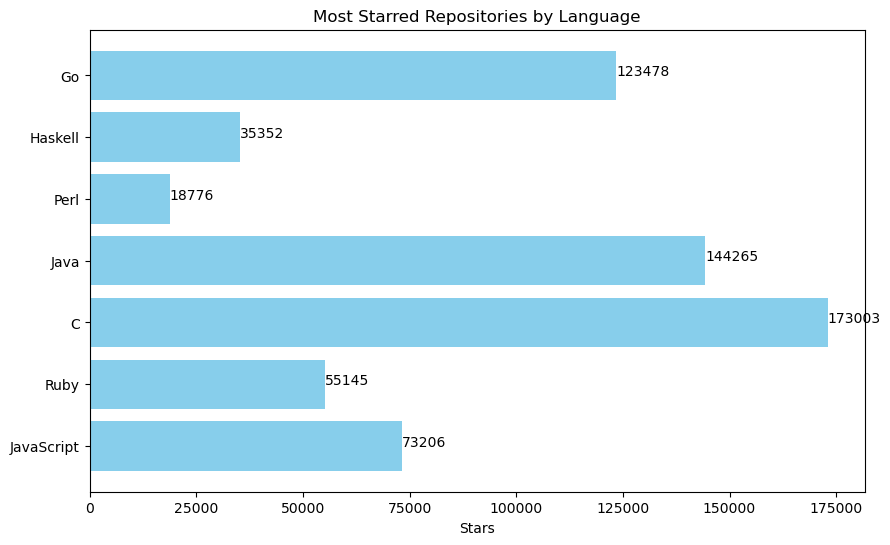


Selected information about each repository:

Language: JavaScript
Name: Font-Awesome
Owner: FortAwesome
Stars: 73206
Repository: https://github.com/FortAwesome/Font-Awesome
Description: The iconic SVG, font, and CSS toolkit

Language: Ruby
Name: rails
Owner: rails
Stars: 55145
Repository: https://github.com/rails/rails
Description: Ruby on Rails

Language: C
Name: linux
Owner: torvalds
Stars: 173003
Repository: https://github.com/torvalds/linux
Description: Linux kernel source tree

Language: Java
Name: JavaGuide
Owner: Snailclimb
Stars: 144265
Repository: https://github.com/Snailclimb/JavaGuide
Description: 「Java学习+面试指南」一份涵盖大部分 Java 程序员所需要掌握的核心知识。准备 Java 面试，首选 JavaGuide！

Language: Perl
Name: cloc
Owner: AlDanial
Stars: 18776
Repository: https://github.com/AlDanial/cloc
Description: cloc counts blank lines, comment lines, and physical lines of source code in many programming languages.

Language: Haskell
Name: shellcheck
Owner: koalaman
Stars: 35352
Repository: https://github.com/koa

In [1]:
import requests
import matplotlib.pyplot as plt

languages = ['JavaScript', 'Ruby', 'C', 'Java', 'Perl', 'Haskell', 'Go']
language_repo_data = {}

for language in languages:
    url = f'https://api.github.com/search/repositories?q=language:{language}&sort=stars'
    headers = {'Accept': 'application/vnd.github.v3+json'}
    r = requests.get(url, headers=headers)
    print(f"Status code for {language}: {r.status_code}")

    if r.status_code == 200:
        response_dict = r.json()
        repo_dicts = response_dict['items']
        language_repo_data[language] = repo_dicts[0]  # 获取每种语言最受欢迎的项目
    else:
        print(f"Failed to retrieve data for {language}")

# 生成图表
languages = []
stars = []
repos = []

for language, repo_dict in language_repo_data.items():
    languages.append(language)
    stars.append(repo_dict['stargazers_count'])
    repos.append(repo_dict['name'])

plt.figure(figsize=(10, 6))
plt.barh(languages, stars, color='skyblue')
plt.xlabel('Stars')
plt.title('Most Starred Repositories by Language')
for index, value in enumerate(stars):
    plt.text(value, index, str(value))
plt.show()

# 打印详细信息
print("\nSelected information about each repository:")
for language, repo_dict in language_repo_data.items():
    print(f"\nLanguage: {language}")
    print(f"Name: {repo_dict['name']}")
    print(f"Owner: {repo_dict['owner']['login']}")
    print(f"Stars: {repo_dict['stargazers_count']}")
    print(f"Repository: {repo_dict['html_url']}")
    print(f"Description: {repo_dict['description']}")

In [ ]:
#使用hnsubmissions.py中的数据，创建一个条形图，显示Hacker News上当前最活跃的讨论。
#条形的高度应对应于文章的评论数。
#条形的标签应包含文章的标题，并且充当到文章讨论页面的链接。

Status code: 200
id: 40668504	status: 200
id: 40668088	status: 200
id: 40667786	status: 200
id: 40667102	status: 200
id: 40667524	status: 200
id: 40660761	status: 200
id: 40668803	status: 200
id: 40668572	status: 200
id: 40663704	status: 200
id: 40666757	status: 200
id: 40661703	status: 200
id: 40667644	status: 200
id: 40667606	status: 200
id: 40665721	status: 200
id: 40657574	status: 200
id: 40660689	status: 200
id: 40665734	status: 200
id: 40659236	status: 200
id: 40667863	status: 200
id: 40648082	status: 200
id: 40664339	status: 200
id: 40667687	status: 200
id: 40650974	status: 200
id: 40645726	status: 200
id: 40660986	status: 200
id: 40644366	status: 200
id: 40667976	status: 200
id: 40644960	status: 200
id: 40662176	status: 200
id: 40656780	status: 200


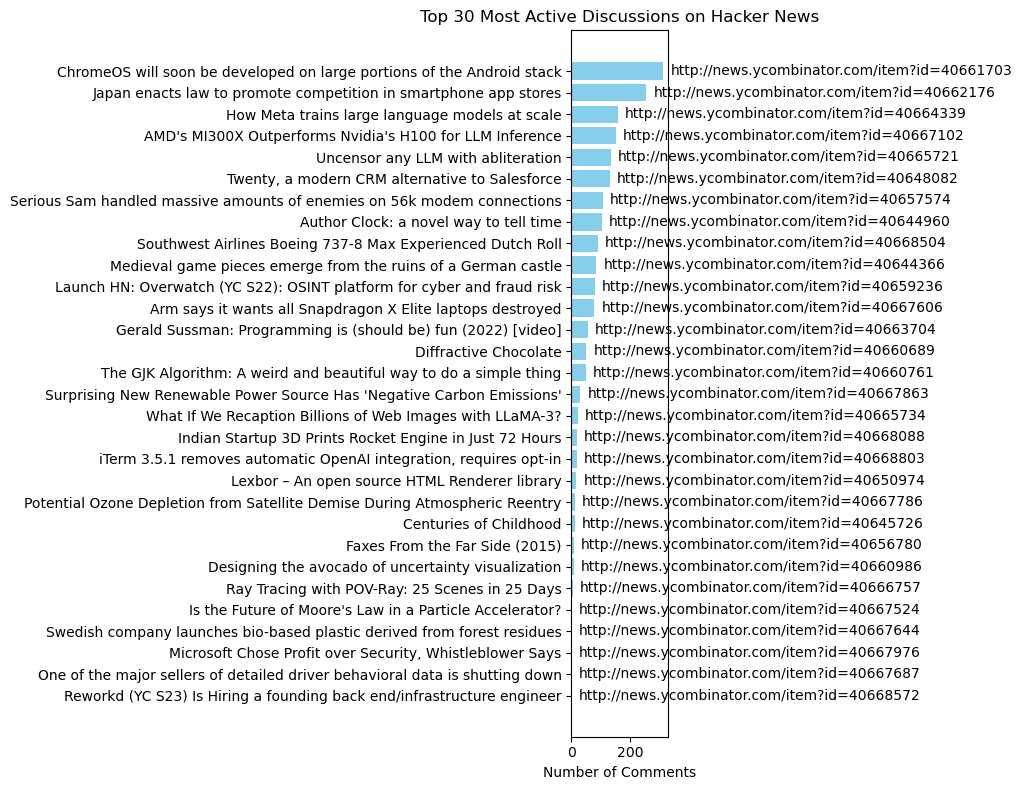


Title: ChromeOS will soon be developed on large portions of the Android stack
Discussion link: http://news.ycombinator.com/item?id=40661703
Comments: 313

Title: Japan enacts law to promote competition in smartphone app stores
Discussion link: http://news.ycombinator.com/item?id=40662176
Comments: 255

Title: How Meta trains large language models at scale
Discussion link: http://news.ycombinator.com/item?id=40664339
Comments: 159

Title: AMD's MI300X Outperforms Nvidia's H100 for LLM Inference
Discussion link: http://news.ycombinator.com/item?id=40667102
Comments: 152

Title: Uncensor any LLM with abliteration
Discussion link: http://news.ycombinator.com/item?id=40665721
Comments: 135

Title: Twenty, a modern CRM alternative to Salesforce
Discussion link: http://news.ycombinator.com/item?id=40648082
Comments: 130

Title: Serious Sam handled massive amounts of enemies on 56k modem connections
Discussion link: http://news.ycombinator.com/item?id=40657574
Comments: 107

Title: Author Clo

In [2]:
import requests
import matplotlib.pyplot as plt
from operator import itemgetter

# 获取Hacker News上当前最受欢迎的文章的ID
url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
r = requests.get(url)
print(f"Status code: {r.status_code}")

# 处理有关每篇文章的信息
submission_ids = r.json()
submission_dicts = []
for submission_id in submission_ids[:30]:
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r = requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()
    
    try:
        comments_count = response_dict['descendants']
    except KeyError:
        comments_count = 0
    
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"http://news.ycombinator.com/item?id={submission_id}",
        'comments': comments_count,
    }
    submission_dicts.append(submission_dict)

# 排序文章，按评论数降序排列
submission_dicts = sorted(submission_dicts, key=itemgetter('comments'), reverse=True)

# 获取标题、评论数和链接
titles = [submission_dict['title'] for submission_dict in submission_dicts]
comments = [submission_dict['comments'] for submission_dict in submission_dicts]
links = [submission_dict['hn_link'] for submission_dict in submission_dicts]

# 创建条形图
plt.figure(figsize=(10, 8))
bars = plt.barh(titles, comments, color='skyblue')
plt.xlabel('Number of Comments')
plt.title('Top 30 Most Active Discussions on Hacker News')

# 添加链接到每个条形的标签
for bar, link in zip(bars, links):
    plt.annotate(link, (bar.get_width(), bar.get_y() + bar.get_height()/2),
                 xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.gca().invert_yaxis()  # 反转y轴，使评论数最多的条形在顶部
plt.tight_layout()
plt.show()

# 打印详细信息
for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['hn_link']}")
    print(f"Comments: {submission_dict['comments']}")


In [ ]:
#在python repos.py中，我们打印了status code 的值，以核实API调用是否成功。
#请编写一个名为test python repos.py的程序，它使用单元测试来断言status code 的值为200。
#想想还可做出哪些断言，如返回的条目(item)数符合预期，仓库总数超过特定的值，等等。

In [ ]:
#在vscode中写：

import unittest
import requests

class TestPythonRepos(unittest.TestCase):

    def setUp(self):
        """执行API调用并存储响应。"""
        self.url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
        self.headers = {'Accept': 'application/vnd.github.v3+json'}
        self.r = requests.get(self.url, headers=self.headers)
        self.response_dict = self.r.json()

    def test_status_code(self):
        """测试API调用的状态码是否为200。"""
        self.assertEqual(self.r.status_code, 200, "Status code is not 200")

    def test_total_repositories(self):
        """测试返回的仓库总数是否大于0。"""
        total_repos = self.response_dict.get('total_count', 0)
        self.assertGreater(total_repos, 0, "Total repositories should be greater than 0")

    def test_items_count(self):
        """测试返回的条目数是否为30。"""
        items = self.response_dict.get('items', [])
        self.assertEqual(len(items), 30, "Number of items returned should be 30")

    def test_top_repo(self):
        """测试返回的最高星级仓库的星标数是否大于一定值。"""
        items = self.response_dict.get('items', [])
        if items:
            top_repo_stars = items[0].get('stargazers_count', 0)
            self.assertGreater(top_repo_stars, 10000, "Top repository should have more than 10000 stars")

if __name__ == '__main__':
    unittest.main()


In [ ]:
PS C:\Users\RubyLowe\Desktop\python_work> & D:/aSoftware/anaconda3/python.exe c:/Users/RubyLowe/Desktop/python_work/test_python_repos.py
....
----------------------------------------------------------------------
Ran 4 tests in 4.283s

OK

In [4]:
import unittest
import requests

class TestPythonRepos(unittest.TestCase):

    def setUp(self):
        """执行API调用并存储响应。"""
        self.url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
        self.headers = {'Accept': 'application/vnd.github.v3+json'}
        self.r = requests.get(self.url, headers=self.headers)
        self.response_dict = self.r.json()

    def test_status_code(self):
        """测试API调用的状态码是否为200。"""
        self.assertEqual(self.r.status_code, 200, "Status code is not 200")

    def test_total_repositories(self):
        """测试返回的仓库总数是否大于0。"""
        total_repos = self.response_dict.get('total_count', 0)
        self.assertGreater(total_repos, 0, "Total repositories should be greater than 0")

    def test_items_count(self):
        """测试返回的条目数是否为30。"""
        items = self.response_dict.get('items', [])
        self.assertEqual(len(items), 30, "Number of items returned should be 30")

    def test_top_repo(self):
        """测试返回的最高星级仓库的星标数是否大于一定值。"""
        items = self.response_dict.get('items', [])
        if items:
            top_repo_stars = items[0].get('stargazers_count', 0)
            self.assertGreater(top_repo_stars, 10000, "Top repository should have more than 10000 stars")

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_items_count (__main__.TestPythonRepos.test_items_count)
测试返回的条目数是否为30。 ... ok
test_status_code (__main__.TestPythonRepos.test_status_code)
测试API调用的状态码是否为200。 ... ok
test_top_repo (__main__.TestPythonRepos.test_top_repo)
测试返回的最高星级仓库的星标数是否大于一定值。 ... ok
test_total_repositories (__main__.TestPythonRepos.test_total_repositories)
测试返回的仓库总数是否大于0。 ... ok

----------------------------------------------------------------------
Ran 4 tests in 3.678s

OK
